# Assignment 1

In [ ]:
name = Nick
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [11]:
# your code here
def my_function(name, age=18, *skills, city="Unknown", **additional_info):

    summary = f"Name: {name}, Age: {age}, City: {city}, Skills: {', '.join(skills)}"
    if additional_info:
        summary += f", Additional Information: {additional_info}"
    return summary

# Example
result = my_function(
    "Nick",
    23,
    "Python",
    "Data Analysis",
    city="Moscow",
    hobby="Hiking",
    profession="Machine Learning"
)
print(result)

Name: Nick, Age: 23, City: Moscow, Skills: Python, Data Analysis, Additional Information: {'hobby': 'Hiking', 'profession': 'Machine Learning'}


## Exercise 1


In [12]:
def is_prime(n):
    """
    Check if the number is prime or not.
    """
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

# Example
print(is_prime(7))
print(is_prime(10))

True
False


## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [14]:
import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in)
    and print the following data:
    the name of the analyzed function,
    the name of all the arguments it takes
    and their types (positional, keyword, etc.)
    """
    # your code here
    func_name = func.__name__
    func_signature = inspect.signature(func)
    func_doc = inspect.getdoc(func)

    print(f"Function Name: {func_name}")
    print(f"Documentation: {func_doc}")
    print("Arguments:")

    for param_name, param in func_signature.parameters.items():
        print(f"  - {param_name}: {param.kind}")

# Example
inspect_function(my_function)

Function Name: my_function
Documentation: None
Arguments:
  - name: POSITIONAL_OR_KEYWORD
  - age: POSITIONAL_OR_KEYWORD
  - skills: VAR_POSITIONAL
  - city: KEYWORD_ONLY
  - additional_info: VAR_KEYWORD


## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message.

In [15]:
from datetime import datetime
from time import sleep

def my_time_now(msg, *, dt=None):
    if dt is None:
        dt = datetime.now()
    print(msg, dt)



In [17]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2025-01-24 09:51:07.303583
The time is now:  2025-01-24 09:51:08.305466
The time is now:  2025-01-24 09:51:09.307253


## Exercise 4

In [21]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count items from input_generator.
    """
    count = 0
    for item in input_generator:
        if count >= max_count:
            break
        yield item
        count += 1

  # Example
def sample_generator():
    for i in range(10):
        yield i

limited_gen = limit(sample_generator(), 5)
for item in limited_gen:
    print(item)

0
1
2
3
4


## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [22]:
# your code here

def pascal_triangle():
    row = [1]
    while True:
        for num in row:
            yield num
        row = [1] + [row[i] + row[i+1] for i in range(len(row) - 1)] + [1]

# Example
limited_pascal = limit(pascal_triangle(), 20)
print(list(limited_pascal))

[1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 4, 6, 4, 1, 1, 5, 10, 10, 5]


## Exercise 6


In [28]:
import pathlib  # can change to os module if you want
import sys

def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by file size.
    Files with the same size are sorted alphabetically.
    """
    path = pathlib.Path(path_to_dir)
    if not path.is_dir():
        raise ValueError(f"{path_to_dir})

    files = [file for file in path.iterdir() if file.is_file()]
    sorted_files = sorted(files, key=lambda f: (f.stat().st_size, f.name))

    return [str(f.name) for f in sorted_files]

SyntaxError: unterminated string literal (detected at line 11) (<ipython-input-28-f57eb69370d6>, line 11)

## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [30]:
import heapq

def merge_sorter(*args):
    iterators = [iter(arg) for arg in args]
    heap = []

    for i, it in enumerate(iterators):
        try:
            first_val = next(it)
            heapq.heappush(heap, (first_val, i))
        except StopIteration:
            continue

    while heap:
        val, i = heapq.heappop(heap)
        yield val
        try:
            next_val = next(iterators[i])
            heapq.heappush(heap, (next_val, i))
        except StopIteration:
            pass
# Example

seq1 = [1, 4, 7]
seq2 = [2, 5, 8]
seq3 = [3, 6, 9]

for num in merge_sorter(seq1, seq2, seq3):
    print(num)

1
2
3
4
5
6
7
8
9


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [32]:
import time
from functools import wraps

def profiler():
    def decorator(func):
        func.calls = 0
        func.last_time_taken = 0

        @wraps(func)
        def wrapper(*args, **kwargs):
            start_time = time.time()
            func.calls += 1
            result = func(*args, **kwargs)
            func.last_time_taken = time.time() - start_time
            return result

        return wrapper
    return decorator

@profiler()
def ackermann(n, m):
    if n == 0:
        return m + 1
    elif m == 0:
        return ackermann(n - 1, 1)
    else:
        return ackermann(n - 1, ackermann(n, m - 1))

# Example
try:
    print(ackermann(3, 4))
except RecursionError:
    print("Maximum recursion depth exceeded.")

print(f"Calls: {ackermann.calls}")
print(f"Last time taken: {ackermann.last_time_taken:.6f} seconds")

125
Calls: 0
Last time taken: 0.000000 seconds


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [33]:
def encode(sequence):
    if not sequence:
        return []

    encoded = []
    current_char = sequence[0]
    count = 1

    for char in sequence[1:]:
        if char == current_char:
            count += 1
        else:
            encoded.append((current_char, count))
            current_char = char
            count = 1

    encoded.append((current_char, count))
    return encoded

# Example
result = encode("aaabbccccdaa")
print(result)

[('a', 3), ('b', 2), ('c', 4), ('d', 1), ('a', 2)]


## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

In [ ]:
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

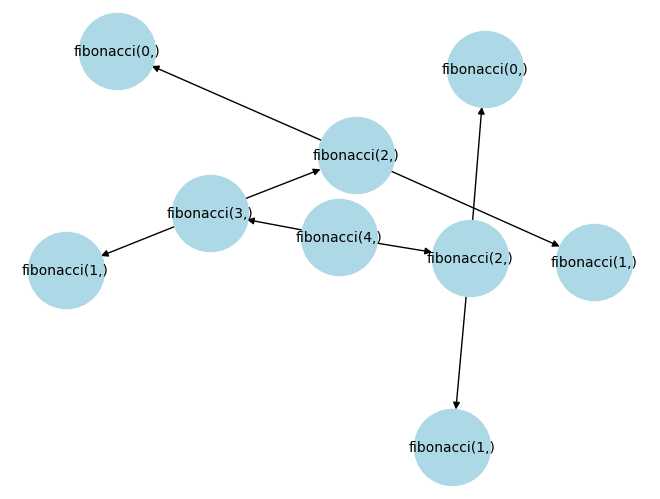

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from functools import wraps

def visualizer(func):
    graph = nx.DiGraph()
    call_id = 0

    @wraps(func)
    def wrapper(*args, **kwargs):
        nonlocal call_id
        current_id = call_id
        graph.add_node(current_id, label=f"{func.__name__}{args}")
        call_id += 1

        parent_id = kwargs.pop("parent_id", None)
        if parent_id is not None:
            graph.add_edge(parent_id, current_id)

        result = func(*args, **kwargs, parent_id=current_id)

        return result

    def show_graph():
        labels = nx.get_node_attributes(graph, "label")
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, with_labels=True, labels=labels, node_size=3000, node_color="lightblue", font_size=10)
        plt.show()

    wrapper.show_graph = show_graph
    return wrapper

@visualizer
def fibonacci(n, parent_id=None):
    if n == 0 or n == 1:
        return n
    return fibonacci(n-1, parent_id=parent_id) + fibonacci(n-2, parent_id=parent_id)

# Example
fibonacci(4)
fibonacci.show_graph()

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization).
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

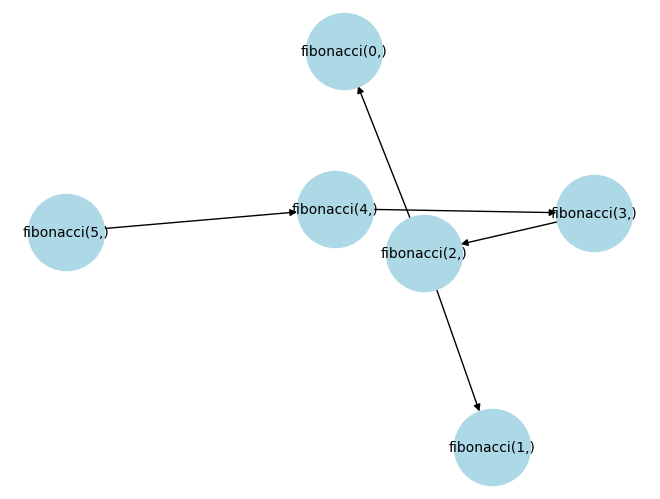

Calls: 0
Last time taken: 0.000000 seconds


In [35]:
from functools import wraps

def memoizer(func):
    cache = {}

    @wraps(func)
    def wrapper(*args, **kwargs):
        if args in cache:
            return cache[args]
        result = func(*args, **kwargs)
        cache[args] = result
        return result

    return wrapper

@profiler()
@memoizer
@visualizer
def fibonacci(n, parent_id=None):
    if n == 0 or n == 1:
        return n
    return fibonacci(n - 1, parent_id=parent_id) + fibonacci(n - 2, parent_id=parent_id)

# Example
fibonacci(5)
fibonacci.show_graph()
print(f"Calls: {fibonacci.calls}")
print(f"Last time taken: {fibonacci.last_time_taken:.6f} seconds")

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

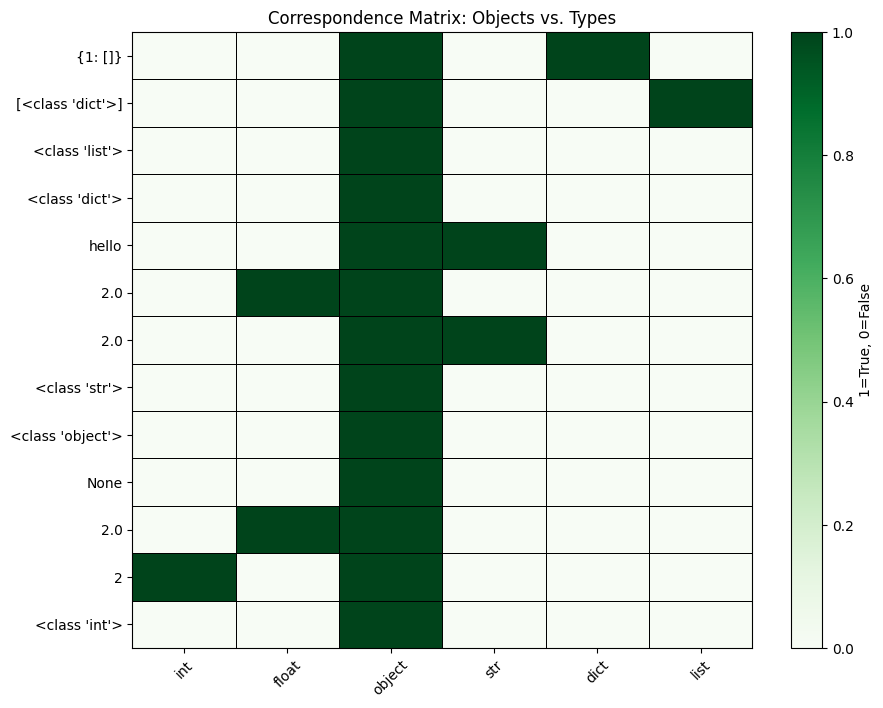

In [36]:
import numpy as np
import matplotlib.pyplot as plt

list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

matrix = np.zeros((len(list_of_objects), len(list_of_types)), dtype=int)

for i, obj in enumerate(list_of_objects):
    for j, t in enumerate(list_of_types):
        if isinstance(obj, t):
            matrix[i, j] = 1

plt.figure(figsize=(10, 8))
plt.pcolormesh(matrix, cmap='Greens', edgecolors='black', linewidth=0.5)
plt.xticks(np.arange(len(list_of_types)) + 0.5, [t.__name__ for t in list_of_types], rotation=45)
plt.yticks(np.arange(len(list_of_objects)) + 0.5, [str(obj) for obj in list_of_objects])
plt.colorbar(label="1=True, 0=False")
plt.title("Correspondence Matrix: Objects vs. Types")
plt.show()